In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('../data/houston-weather.csv', low_memory=False)

In [3]:
weather.describe()

,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
count,82305.000000,81466.000000,4394.000000,45069.000000,45059.000000,29986.000000
mean,0.000190,0.000061,70.608330,78.873727,59.985464,64.441940
std,0.014771,0.009269,12.934433,12.898986,14.094386,13.295743
min,0.000000,0.000000,28.000000,9.000000,7.000000,6.000000
25%,0.000000,0.000000,62.000000,71.000000,49.000000,55.000000
50%,0.000000,0.000000,73.000000,81.000000,63.000000,68.000000
75%,0.000000,0.000000,82.000000,89.000000,73.000000,75.000000
max,1.700000,2.000000,92.000000,109.000000,95.000000,98.000000


In [4]:
weather.NAME.unique()

array(['BAYTOWN, TX US', 'HOUSTON NORTH HOUSTON, TX US', 'ALVIN, TX US',
       'CYPRESS, TX US', 'HOUSTON HEIGHTS, TX US', 'CLODINE, TX US',
       'HOUSTON NATIONAL WEATHER SERVICE OFFICE, TX US',
       'HOUSTON INTERCONTINENTAL AIRPORT, TX US'], dtype=object)

In [5]:
weather_stations = weather.NAME.unique()
for name in weather_stations:
    station_weather = weather[weather.NAME == name]
    num_dates = len(station_weather)
    num_null_temps = len(station_weather[station_weather.TMIN.isnull()])
    print('%d dates with %d null values for "%s"' % (num_dates, num_null_temps, name))

12946 dates with 70 null values for "BAYTOWN, TX US"
10682 dates with 10682 null values for "HOUSTON NORTH HOUSTON, TX US"
9738 dates with 1240 null values for "ALVIN, TX US"
10293 dates with 10293 null values for "CYPRESS, TX US"
9587 dates with 9587 null values for "HOUSTON HEIGHTS, TX US"
10795 dates with 10795 null values for "CLODINE, TX US"
9822 dates with 7 null values for "HOUSTON NATIONAL WEATHER SERVICE OFFICE, TX US"
13872 dates with 2 null values for "HOUSTON INTERCONTINENTAL AIRPORT, TX US"


Let's use **HOUSTON INTERCONTINENTAL AIRPORT, TX US**

In [6]:
station_weather = weather[weather.NAME == 'HOUSTON INTERCONTINENTAL AIRPORT, TX US']
dates_total = len(station_weather)
freezing_dates = station_weather[station_weather.TMIN < 33]
freezing_dates_total = len(freezing_dates)
print('%d dates with %d freezing dates' % (dates_total, freezing_dates_total))

13872 dates with 459 freezing dates


# Distribution of temperatures below freezing

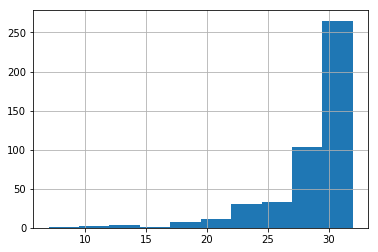

In [7]:
freezing_dates.TMIN.hist()
plt.show()

In [8]:
#freezing_dates['YEAR'] = freezing_dates['DATE']
#freezing_dates['DATE'].iloc[0][0:4]
year = freezing_dates['DATE'].apply(lambda date: str(date[0:4]))
freezing_dates.insert(loc=0, column='YEAR', value = year.values)
freezing_dates.head()

,YEAR,STATION,NAME,DATE,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES
73863,1980,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",1980-01-01,0.0,",,0",0.0,",,0",NaN,NaN,61.0,",,0",28.0,",,0",NaN,NaN
73864,1980,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",1980-01-02,0.0,",,0",0.0,",,0",NaN,NaN,70.0,",,0",32.0,",,0",NaN,NaN
73867,1980,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",1980-01-05,0.0,",,0",0.0,",,0",NaN,NaN,65.0,",,0",31.0,",,0",NaN,NaN
73894,1980,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",1980-02-01,0.0,",,0",0.0,",,0",NaN,NaN,47.0,",,0",28.0,",,0",NaN,NaN
73895,1980,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",1980-02-02,1.4,",,0",0.0,",,0",NaN,NaN,42.0,",,0",32.0,",,0",NaN,NaN


## Number of freezing days per year

In [9]:
freezing_dates_by_year = freezing_dates.groupby('YEAR')['TMIN'].count()
# freezing_dates_by_year.plot.line()

x = freezing_dates['YEAR'].unique().astype(int)
y = freezing_dates_by_year

plt.plot(x, y, '-')

created line with slope -0.23295765401 and intercept 477


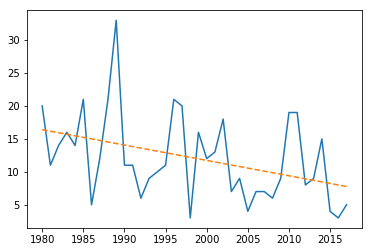

In [10]:
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

print('created line with slope %s and intercept %d' % (slope, intercept))

plt.plot(x, abline_values, '--')

plt.show()